# TensorFlow Datasets
The tensorflow-datasets library gives us another means of accessing a variety of useful datasets.
The tensorflow-datasets library is installed independently of TensorFlow itself.

## Import Tensorflow and Tensorflow databases

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
tf.__version__





ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
test, train = tfds.load('cars196',split = ['train','test'])

## Listing the avaliable datasets

In [3]:
# see avaliable datasets
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

# **Extract - Transform - Load (ETL)**
When creating an input data pipeline, typically, we perform the **ETL(Extract, Transform, and Load)** process. 
1.  **Extract**. extract the data from different data sources like local data sources, which can be from a hard disk or extract data from remote data sources like cloud storage.It handles everything from downloading the raw data to parsing and splitting it, giving us a dataset. 
2. **Transform** allows to shuffle, perform augmentation, convert data to tensors etc. 
3. **Loading** the data involves cleaning the data and shaping it into a format that we can pass to the deep learning model for training. How you load the data can significantly impact on the performance of the training pipelines. 

The pre-processing of the data occurs on the CPU, and the model will be typically trained on GPU/TPU.


---


![alt text](https://miro.medium.com/max/2450/1*3Zi3_VUAYh5w78KGLoO37g.png)


## Extract the dataset
Typically, the extract phase would involve  downloading a zip file, unzip it, and sorting it into directories, loading from those directories, etc
We can simply use the load function, specifying the name and any other keyword arguments. 
As stated on the documentation page, running the function with split=None (the default) returns a dictionary of the splits, with the keys "test" and "train".

In [4]:
# Extract the mnist dataset. Files will be stored in your tensor flow datasets directory,
# and they'll be sharded out, which means that larger files will split into multiple smaller ones
mdata = tfds.load(name="kmnist", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incomplete1A9OIM/kmnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incomplete1A9OIM/kmnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
#inspecting shapes and datatypes, the data of tfds is installed using the 3rd axes
mdata

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

## Transform the dataset
Transform means applying some functions to change it, for example, normalizing it, or using augmentation on images to prevent overfitting. Here are some examples:

dataset.shuffle(NuM_SAMPLING) 

For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required

dataset=[1,2,3,4,5,6,7,8], dataset.shuffle(3)

Creat a buffer with first 3 elements, random sample one put in the new dataset, new elements will be taken and placed into the empty position of shuffle buffer. Randome sample one, put in the new dataset.

dataset.repeat(num_EPOCHS)

dataset =[1,2,3], dataset.repeat(2) ->[1,2,3,1,2,3]

repeat the complete dataset 

Dataset.map(lambda x:...)

dataset.batch(BATCH_SIZE)

dataset=[1,2,3,4,5], dataset.batch(2) -> batch1=[1,2], batch2=[3,4], batch3=[5]

dataset.batch(2, drop_reminder=True) -> batch1=[1,2], batch2=[3,4]

Combine the consecutive elements of the dataset into batches

In [6]:
mdata.shuffle(100)

<ShuffleDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [7]:
train_batches =mdata.shuffle(100).batch(10)

## Load

TypeError: ignored

Label: 9


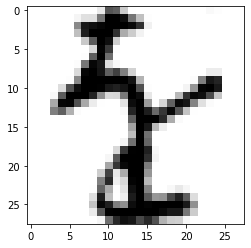

Label: 1


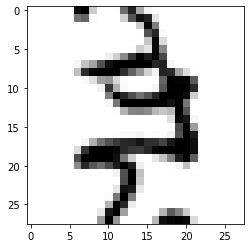

In [ ]:
#Load
iterator =mdata.take(2) # fetch 10 samples form the dataset

for data in iterator:
  image =data["image"].numpy().squeeze()
  label =data["label"].numpy()
  
  print("Label: {}".format(label))
  plt.imshow(image, cmap=plt.cm.binary)
  plt.show()

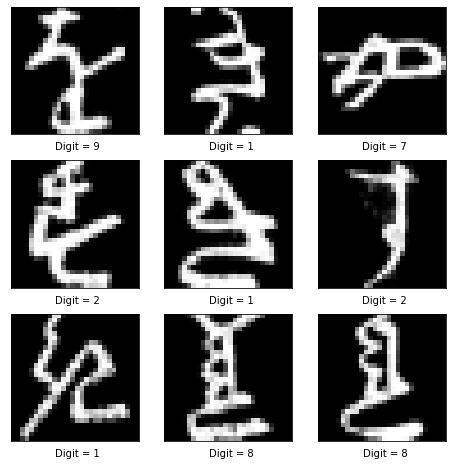

In [ ]:
# View some examples from the dataset

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for i, (elem, ax) in enumerate(zip(mdata, axes.flat)):
    image = tf.squeeze(elem['image'])
    label = elem['label']
    
    ax.imshow(image, cmap='gray')
    ax.text(0.7, -0.12, f'Digit = {label}', ha='right',
            transform=ax.transAxes, color='black')
    ax.set_xticks([])
    ax.set_yticks([])

## View dataset information


In [ ]:
mnist, info=tfds.load('mnist', with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

## Load specific version of Datasets
TFDS versioning comprises of three numbers delimited by a period. The first number indicates the major version of the dataset, the second denotes the minor version, and finally, the third number corresponds to the patch level.

To get the latest version inside a particular major version, specify the desired major version and place asterisks for the rest.


In [ ]:
builder = tfds.builder('mnist')
builder.info.version 


Version('3.0.1')

In [ ]:
#as_supervised=True, dataset will be preformatted into tuples of data and label 
dataset=tfds.load('mnist', as_supervised=True) 
dataset

{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
for image, label in dataset['train'].take(2):
  print(image.shape, label.shape)

(28, 28, 1) ()
(28, 28, 1) ()


In [ ]:
#as_supervised=False, dataset will be avaliable as dictionary
dataset=tfds.load('mnist', as_supervised=True) 
dataset

{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

# Fine-grained control over the data
## Split and Slices
Python Splits API allows Splits, Merging Slicing, and Composition. The core of this API is to use string to determine splits.


More about how python slice Lists/Arrays and Tuples please refer to https://www.pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/

In [ ]:
train_ds, test_ds =tfds.load('mnist', split=['train','test'])
print(type(train_ds))
print(len(list(train_ds)))
print(len(list(test_ds)))
#merge by using + sign
combined_mnist =tfds.load('mnist:3.*.*', split='train+test')
#Slicing by index
first1k =tfds.load('mnist:3.*.*', split ='train[:1000]')
print(len(list(first1k)))
#Slicing by percent
first10p=tfds.load('mnist:3.*.*', split ='train[:10%]')
print(len(list(first10p)))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
60000
10000
10000
12000


From the MNISTv3 dataset, if you want to select the last 24000 records out of the 60000 training records. How should you do?

### K-fold splits
the Validation dataset are each going to be 20%.[0%:20%],[20%:40%],...

the Training dataset are each going to be complementary 80%. [20%:100%],[0%:20%]+[20%:80%]...

In [ ]:
val_ds=tfds.load('mnist', split=['train[{}%:{}%]'.format(k,k+20) for k in range (0, 100, 20)])
train_ds=tfds.load('mnist', split=['train[:{}%]+train[{}%:]'.format(k,k+20) for k in range (0,100, 20)])


In [ ]:
print(len(list(val_ds)))
val_ds

5


[<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>]

In [ ]:
print(len(list(train_ds)))
train_ds

In [ ]:
data, info=tfds.load('mnist', with_info=True)

# Data from real life
Real-life input data may contain non-numerical data such as strings, numbers that represent categories.  We can create input pipelines to process these inputs into the form that can be used by the neural network.

1.   **Example image model pipeline**
*   Aggregate data from files in a distributed file system
*   Apply random perturbations to each image
*   Merge randomly selected images into a batch for training

2.   **Example text model pipeline**
*   Extracting symbols from raw text data
Converting them to embedding identifiers with a lookup table
*   Batching together sequences of different lengths





**The Iris dataset example**
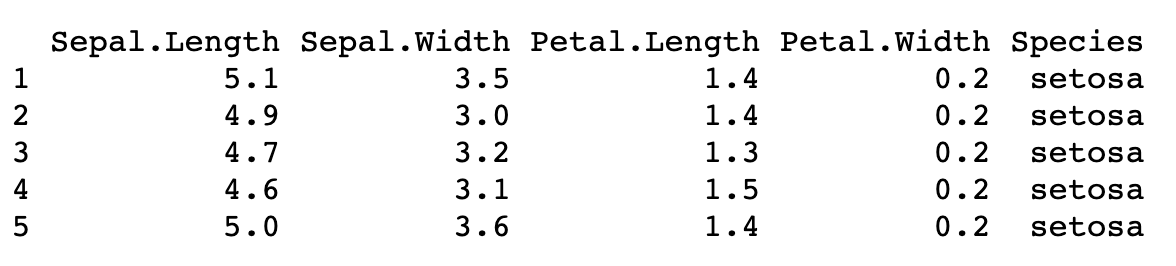

### Bucketized columns
Often, you don't want to feed a number directly into the model, but instead split its value into different categories based on numerical ranges. Consider raw data that represents a person's age. Instead of representing age as a numeric column, we could split the age into several buckets using a [bucketized column](https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column). Notice the one-hot values below describe which age range each row matches.
     Buckets include the left boundary, and exclude the right boundary. 
 For example, consider raw data that represents the year a house was built. Instead of representing that year as a scalar numeric column, we could split the year into the following four buckets:
![alt text](https://www.tensorflow.org/images/feature_columns/bucketized_column.jpg)

Dividing year data into four buckets.

The model will represent the buckets as follows:
>Date Range| Description
>------------|--------------------
>< 1960 |  	[1, 0, 0, 0]
>>= 1960 but < 1980 | [0, 1, 0, 0]
>>= 1980 but < 2000 | [0, 0, 1, 0]
>>= 2000| [0, 0, 0, 1]

Why would you want to split a number—a perfectly valid input to your model—into a categorical value? Well, notice that the categorization splits a single input number into a four-element vector. Therefore, the model now can learn four individual weights rather than just one; four weights creates a richer model than one weight. More importantly, bucketizing enables the model to clearly distinguish between different year categories since only one of the elements is set (1) and the other three elements are cleared (0). For example, when we just use a single number (a year) as input, a linear model can only learn a linear relationship. So, bucketing provides the model with additional flexibility that the model can use to learn.

The following code demonstrates how to create a bucketized feature:

Source:[link text](https://colab.research.google.com/drive/1_sAitZMGkBqcDXTMYLs2RIkpo9RRKZdF#scrollTo=7R6Azy4ElGOr)


### Classify structured data using Keras preprocessing layers
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/preprocessing_layers.ipynb

### Better performance with the tf.data API
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/data_performance.ipynb#scrollTo=qFdPvlXBOdUN

## Further reading and resources
https://www.tensorflow.org/datasets

https://www.tensorflow.org/datasets/catalog/overview

https://wwww.tensorflow.org/datasets/api_docs/python/tfds

https://tensorflow.org/datasets/api_docs/python/tfds/load

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/data_performance.ipynb